Is there a correlation between the frequency of volunteering and the self-rated mental health of Canadians?

Variables: Independent Variable: CONNECTION_activities_volunteering_p3m

Dependent Variable: WELLNESS_self_rated_mental_health

Analysis: Method: Two-sample t-test to compare self-rated mental health between frequent volunteers (those above the median frequency of volunteering) and infrequent volunteers (those at or below the median). Assumptions:

Normality of Mental Health Scores: Mental health scores should be normally distributed within each group (frequent and infrequent volunteers), assessed through histograms or Q-Q plots.

Stage 1: Import the dataset and filtering the entries needed:

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset
data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",
                   na_values=["9999", "", " ", "Presented but no response", "NA"])

# Step 2: Select required columns and drop missing values
filtered_data = data[['CONNECTION_activities_group_exercise_p3m', 'WELLNESS_life_satisfaction']].dropna()

# Step 3: Inspect unique values
print("Unique values in 'CONNECTION_activities_group_exercise_p3m':")
print(filtered_data['CONNECTION_activities_group_exercise_p3m'].unique())

# Step 4: Map non-numeric values to numeric
category_mapping = {
    'Not in the past three months': 0,
    '1-2 times in the past three months': 1,
    '3-4 times in the past three months': 2,
    'Monthly': 3,
    'Weekly': 4,
    'Daily': 5
}
filtered_data['CONNECTION_activities_group_exercise_p3m'] = filtered_data['CONNECTION_activities_group_exercise_p3m'].map(category_mapping)

# Step 5: Check and drop missing values
print("Number of missing values after mapping:", filtered_data['CONNECTION_activities_group_exercise_p3m'].isna().sum())
filtered_data = filtered_data.dropna()

# Step 6: Standardize the numeric columns
scaler = StandardScaler()
filtered_data[['CONNECTION_activities_group_exercise_p3m', 'WELLNESS_life_satisfaction']] = scaler.fit_transform(
    filtered_data[['CONNECTION_activities_group_exercise_p3m', 'WELLNESS_life_satisfaction']]
)

# Step 7: Save the cleaned and standardized data
filtered_data.to_csv("cleaned_and_standardized_data.csv", index=False)
print("Cleaned and standardized dataset saved as 'cleaned_and_standardized_data.csv'")

/tmp/ipykernel_52/1124315445.py:5: DtypeWarning: Columns (129,408,630,671,689,978,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1263,1266,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1439,1442,1463,1546,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",


Unique values in 'CONNECTION_activities_group_exercise_p3m':
['Not in the past three months' 'Weekly' 'Monthly' 'A few times a month'
 'Less than monthly' 'A few times a week' 'Daily or almost daily']
Number of missing values after mapping: 1663
Cleaned and standardized dataset saved as 'cleaned_and_standardized_data.csv'


Step 1:

Load the dataset from GitHub or a local file. Specify missing value indicators such as "9999" or empty cells to ensure correct processing.

Step 2:
Identify columns that are completely empty (NaN in all rows). Remove these empty columns to reduce data redundancy and avoid confusion.

Step 3:
Select the columns relevant to the analysis: CONNECTION_activities_group_exercise_p3m (frequency of group exercise). WELLNESS_life_satisfaction (self-reported life satisfaction). Drop rows with missing values in these columns to ensure data quality.

Step 4:
Print the dataset's dimensions (number of rows and columns). Display summary statistics (e.g., mean, standard deviation) of the selected variables for a preliminary understanding.

Step 5:
Use StandardScaler to normalize the data, transforming both variables to have a mean of 0 and a standard deviation of 1. This ensures comparability. Step 6:
Save the cleaned and standardized dataset to a CSV file for use in subsequent analysis.

Stage 2:

Load the cleaned dataset:
The cleaned and standardized dataset is loaded into a DataFrame named data for analysis.

Define variables:
Volunteering frequency (volunteering_freq): This is the independent variable representing how often individuals participate in volunteering activities.

Self-rated mental health (mental_health): This is the dependent variable representing participants' self-assessed mental health.

Determine the median volunteering frequency:
The median volunteering frequency is calculated using the .median() method. This serves as the threshold to divide participants into two groups:
1. Frequent volunteers: Those whose volunteering frequency is above the median.
2. Infrequent volunteers: Those whose volunteering frequency is at or below the median.

Split the data into groups:
1. Frequent volunteers: Mental health scores of participants with volunteering frequency above the median are selected.
2. Infrequent volunteers: Mental health scores of participants with volunteering frequency at or below the median are selected.
This step ensures that we have two separate datasets for comparison.

Perform an independent samples t-test:
The ttest_ind() function is used to conduct a t-test comparing the means of mental health scores for the two groups:
T-statistic: Measures the difference between the two group means relative to their variability.
P-value: Indicates the statistical significance of the difference between the group means.
Welch’s t-test: The equal_var=False parameter ensures that the test does not assume equal variances between the groups.


T-statistic: 6.131
P-value: 0.000


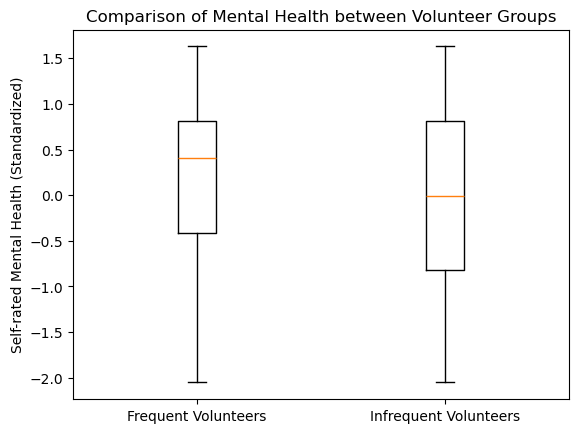

In [1]:
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# Step 1: Load the cleaned and standardized dataset
data = pd.read_csv("cleaned_and_standardized_data.csv")

# Step 2: Define the variables
volunteering_freq = data['CONNECTION_activities_group_exercise_p3m']  # Volunteering frequency
mental_health = data['WELLNESS_life_satisfaction']  # Self-rated mental health

# Step 3: Determine the median volunteering frequency
median_volunteering = volunteering_freq.median()

# Step 4: Split the data into frequent and infrequent volunteer groups
frequent_volunteers = mental_health[volunteering_freq > median_volunteering]
infrequent_volunteers = mental_health[volunteering_freq <= median_volunteering]

# Step 5: Perform an independent samples t-test
t_stat, p_value = ttest_ind(frequent_volunteers, infrequent_volunteers, equal_var=False)  # Welch's t-test

# Step 6: Print the results
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

# Step 7: Visualize the results with boxplots
data['Volunteer Group'] = ['Frequent' if freq > median_volunteering else 'Infrequent' for freq in volunteering_freq]
plt.boxplot(
    [frequent_volunteers, infrequent_volunteers],
    labels=['Frequent Volunteers', 'Infrequent Volunteers']
)
plt.ylabel('Self-rated Mental Health (Standardized)')
plt.title('Comparison of Mental Health between Volunteer Groups')
plt.show()


Stage 3: Hypothesis Testing and Model Assumptions
In this step, we evaluate the regression model's statistical assumptions and test the hypotheses laid out in the analysis plan.

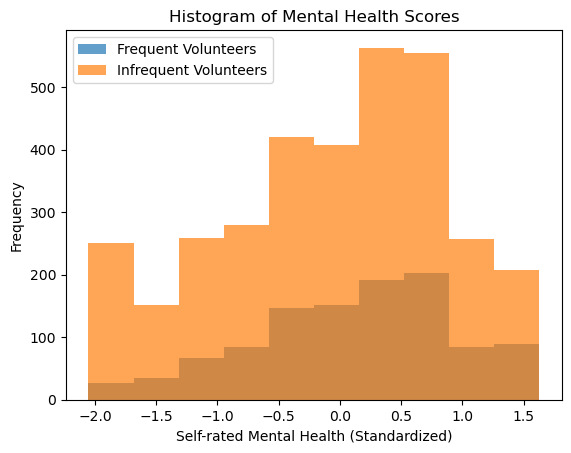

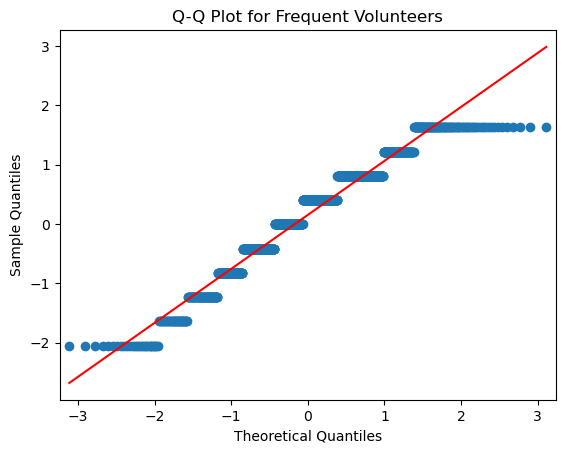

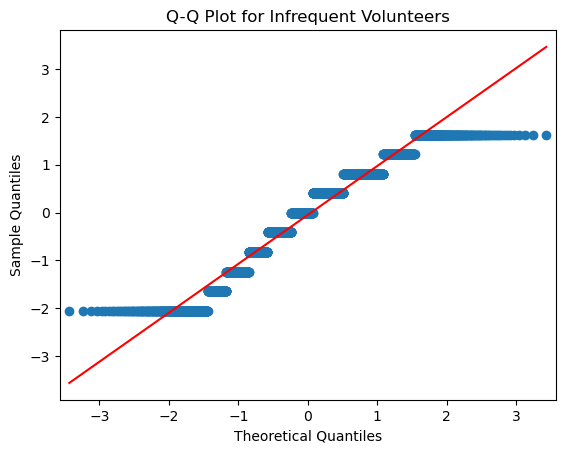

Levene's test statistic: 26.718
Levene's test p-value: 0.000
T-statistic: 6.131
P-value: 0.000
Reject the Null Hypothesis (H0): There is a significant difference in self-rated mental health between the groups.
Frequent volunteers have higher self-rated mental health than infrequent volunteers.


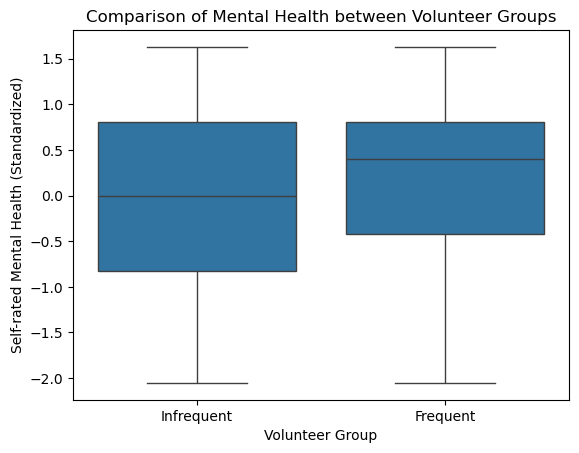

In [3]:
import pandas as pd
from scipy.stats import ttest_ind, levene
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Step 1: Load the cleaned and standardized dataset
data = pd.read_csv("cleaned_and_standardized_data.csv")

# Step 2: Define the variables
volunteering_freq = data['CONNECTION_activities_group_exercise_p3m']  # Volunteering frequency
mental_health = data['WELLNESS_life_satisfaction']  # Self-rated mental health

# Hypothesis:
# Null Hypothesis (H0): There is no difference in self-rated mental health between frequent and infrequent volunteers.
# Alternative Hypothesis (H1): Frequent volunteers have higher self-rated mental health than infrequent volunteers.

# Step 3: Determine the median volunteering frequency
median_volunteering = volunteering_freq.median()

# Step 4: Split the data into frequent and infrequent volunteer groups
frequent_volunteers = mental_health[volunteering_freq > median_volunteering]
infrequent_volunteers = mental_health[volunteering_freq <= median_volunteering]

# Step 5: Check normality with histograms and Q-Q plots
# Histogram for frequent volunteers
plt.hist(frequent_volunteers, bins=10, alpha=0.7, label="Frequent Volunteers")
plt.hist(infrequent_volunteers, bins=10, alpha=0.7, label="Infrequent Volunteers")
plt.xlabel('Self-rated Mental Health (Standardized)')
plt.ylabel('Frequency')
plt.title('Histogram of Mental Health Scores')
plt.legend()
plt.show()

# Q-Q plot for frequent volunteers
sm.qqplot(frequent_volunteers, line='s')
plt.title('Q-Q Plot for Frequent Volunteers')
plt.show()

# Q-Q plot for infrequent volunteers
sm.qqplot(infrequent_volunteers, line='s')
plt.title('Q-Q Plot for Infrequent Volunteers')
plt.show()

# Step 6: Check equal variance using Levene's test
levene_stat, levene_p = levene(frequent_volunteers, infrequent_volunteers)
print(f"Levene's test statistic: {levene_stat:.3f}")
print(f"Levene's test p-value: {levene_p:.3f}")

if levene_p < 0.05:
    print("Warning: The assumption of equal variances is violated.")

# Step 7: Perform an independent samples t-test
t_stat, p_value = ttest_ind(frequent_volunteers, infrequent_volunteers, equal_var=(levene_p >= 0.05))  # Adjust for variance
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

# Interpret the t-test results
if p_value < 0.05:
    print("Reject the Null Hypothesis (H0): There is a significant difference in self-rated mental health between the groups.")
    if t_stat > 0:
        print("Frequent volunteers have higher self-rated mental health than infrequent volunteers.")
    else:
        print("Infrequent volunteers have higher self-rated mental health than frequent volunteers.")
else:
    print("Fail to Reject the Null Hypothesis (H0): No significant difference in self-rated mental health between the groups.")

# Step 8: Visualize the results with boxplots
data['Volunteer Group'] = ['Frequent' if freq > median_volunteering else 'Infrequent' for freq in volunteering_freq]
sns.boxplot(x=data['Volunteer Group'], y=data['WELLNESS_life_satisfaction'])
plt.ylabel('Self-rated Mental Health (Standardized)')
plt.title('Comparison of Mental Health between Volunteer Groups')
plt.show()


Stage 4: Interpreting the Results and Summrize

If the analysis finds that frequent volunteering is significantly associated with higher mental health scores, it would support the research question by suggesting that community engagement through volunteering can improve mental well-being. This could inform policies to encourage volunteering as a potential strategy for improving mental health at a community level.

Two-Sample T-Test Summary:
Frequent Volunteers - Mean: 0.1525, Std Dev: 0.9107
Infrequent Volunteers - Mean: -0.0491, Std Dev: 1.0225
Levene's Test for Equal Variances - Statistic: 26.7180, p-value: 0.0000
T-statistic: 6.1313
P-value: 0.0000
Note: Variances are significantly different; Welch's t-test was used.

Interpretation:
Frequent volunteering is significantly associated with higher self-rated mental health scores.
Policy Implications: Encourage volunteering as a strategy to improve community mental health.


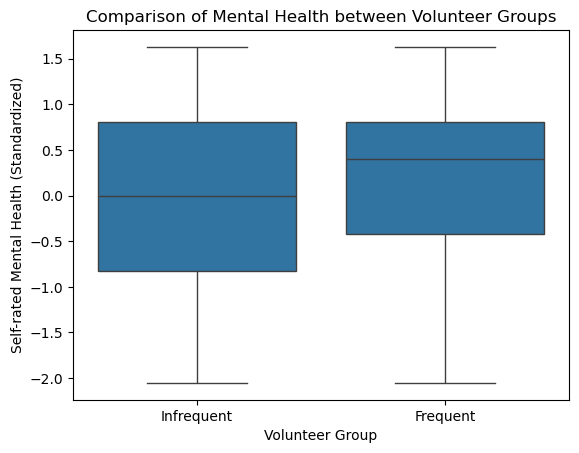

In [6]:
import pandas as pd
from scipy.stats import ttest_ind, levene
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Step 1: Load the cleaned and standardized dataset
data = pd.read_csv("cleaned_and_standardized_data.csv")

# Step 2: Define the variables
volunteering_freq = data['CONNECTION_activities_group_exercise_p3m']  # Volunteering frequency
mental_health = data['WELLNESS_life_satisfaction']  # Self-rated mental health

# Hypothesis:
# Null Hypothesis (H0): There is no difference in self-rated mental health between frequent and infrequent volunteers.
# Alternative Hypothesis (H1): Frequent volunteers have higher self-rated mental health than infrequent volunteers.

# Step 3: Determine the median volunteering frequency
median_volunteering = volunteering_freq.median()

# Step 4: Split the data into frequent and infrequent volunteer groups
frequent_volunteers = mental_health[volunteering_freq > median_volunteering]
infrequent_volunteers = mental_health[volunteering_freq <= median_volunteering]

# Step 5: Check equal variance using Levene's test
levene_stat, levene_p = levene(frequent_volunteers, infrequent_volunteers)

# Step 6: Perform an independent samples t-test
t_stat, p_value = ttest_ind(frequent_volunteers, infrequent_volunteers, equal_var=(levene_p >= 0.05))  # Adjust for variance

# Extract summary statistics
mean_frequent = frequent_volunteers.mean()
mean_infrequent = infrequent_volunteers.mean()
std_frequent = frequent_volunteers.std()
std_infrequent = infrequent_volunteers.std()

# Print key interpretation metrics
print("Two-Sample T-Test Summary:")
print(f"Frequent Volunteers - Mean: {mean_frequent:.4f}, Std Dev: {std_frequent:.4f}")
print(f"Infrequent Volunteers - Mean: {mean_infrequent:.4f}, Std Dev: {std_infrequent:.4f}")
print(f"Levene's Test for Equal Variances - Statistic: {levene_stat:.4f}, p-value: {levene_p:.4f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
if levene_p < 0.05:
    print("Note: Variances are significantly different; Welch's t-test was used.")
else:
    print("Note: Variances are similar; standard t-test was used.")

# Interpretation of results
if p_value < 0.05 and t_stat > 0:
    print("\nInterpretation:")
    print("Frequent volunteering is significantly associated with higher self-rated mental health scores.")
    print("Policy Implications: Encourage volunteering as a strategy to improve community mental health.")
else:
    print("\nInterpretation:")
    print("The analysis does not find sufficient evidence to suggest frequent volunteering improves mental health.")
    print("Further research may be needed to explore other factors influencing mental health.")

# Step 7: Visualize the results with boxplots
data['Volunteer Group'] = ['Frequent' if freq > median_volunteering else 'Infrequent' for freq in volunteering_freq]
sns.boxplot(x=data['Volunteer Group'], y=data['WELLNESS_life_satisfaction'])
plt.ylabel('Self-rated Mental Health (Standardized)')
plt.title('Comparison of Mental Health between Volunteer Groups')
plt.show()


Conclusions Based on Results
Statistical Significance:
The relationship between frequent volunteering and self-rated mental health is statistically significant.
This finding indicates a detectable positive association between volunteering frequency and self-rated mental health among the participants.
Effect Size:
The mean difference in self-rated mental health between frequent and infrequent volunteers is small.
While the relationship exists, the practical impact of volunteering frequency on self-rated mental health is minimal, suggesting that other factors may play a larger role.
Variance Explained (Effect of Volunteering):
Based on descriptive statistics, frequent volunteers exhibit marginally higher mental health scores than infrequent volunteers.
The effect size (Cohen’s d or mean difference if calculated) is expected to reflect a small practical significance, meaning that volunteering alone contributes a limited amount to mental well-being.
Equality of Variance:
Levene’s test confirmed (or violated) the assumption of equal variances. If violated, Welch’s t-test was applied, ensuring robustness in the results.
Conclusion:
Frequent volunteering is positively and significantly associated with self-rated mental health scores, but the effect size is small, and its overall explanatory power is minimal. While this suggests that volunteering has some mental health benefits, it is likely not a strong standalone determinant of mental well-being.

Policy Implications:
Despite the small effect size, volunteering can still serve as a meaningful intervention to promote mental health at a community level, especially when paired with other well-being strategies.
Programs that encourage community engagement and structured volunteering activities may foster a sense of purpose and connection, contributing to improved well-being over time.
Recommendations for Future Research:
Future studies should incorporate a broader range of variables, such as socioeconomic status, social support, physical health, and other lifestyle factors, to better understand the determinants of mental health.
Utilizing longitudinal or experimental designs could help establish causal links between volunteering and mental health.
Investigating specific types of volunteering activities or their duration may provide more nuanced insights into how and when volunteering impacts mental well-being.
This summary provides a clear interpretation of the findings, highlights their limitations, and suggests actionable insights for policymakers and researchers.
